In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *
import math as math

import numpy as np
import matplotlib.pyplot as ply
import scipy, pylab

In [2]:
m = UNITS.meter
s = UNITS.second
kg = UNITS.kilogram
AU = UNITS.astronomical_unit
N = UNITS.newton

<Unit('newton')>

In [3]:
#asteroid is starting approximately "r" away in the x and y distance
px_0 = 300000 * m
py_0 = 300000 * m
vx_0 = 0 * m/s
vy_0 = -1000 * m/ s
init = State(px=px_0,
             py=py_0,
             vx=vx_0,
             vy=vy_0)

,values
px,300000 meter
py,300000 meter
vx,0.0 meter / second
vy,-1000.0 meter / second


In [4]:
system = System (init = init,
                G = 6.67408e-11*N/kg**2 * m**2,
        #mass of asteroid that killed dinosaurs
                m1 = 6.1e15* kg,
        #earth mass
                m2 = 5.972324e24* kg,
                t_0 = 0 * s,
                t_end = 315360000* s,
        #radius of earth plus radius of asteroid that killed the dinosaurs
                r_final = (6371000 + 5000)* m)

,values
init,px 300000 meter py 3...
G,6.67408e-11 meter ** 2 * newton / kilogram ** 2
m1,6100000000000000.0 kilogram
m2,5.972324e+24 kilogram
t_0,0 second
t_end,315360000 second
r_final,6376000 meter


In [5]:
def universal_gravitation(state, system):
    px, py, vx, vy = state
    unpack(system)
    

    position = Vector(px, py)
    P = sqrt(px**2 + py**2)
    F_magnitude = G * m1 * m2/ ((P)**2)
    
    P_direction = position/P
    
    F = P_direction * (-1) * F_magnitude

    
    return F

In [6]:
universal_gravitation(init, system)

<Quantity([-9.55162141e+18 -9.55162141e+18], 'newton')>

In [23]:
def event_func(state, t, system):

    px, py, vx, vy = state
    
    P = abs(sqrt(px**2 + py**2))
    
    return P - abs(system.r_final - 1)

In [24]:
universal_gravitation(init, system)

<Quantity([-9.55162141e+18 -9.55162141e+18], 'newton')>

In [25]:
def slope_func(state, t, system):
    px, py, vx, vy = state
    unpack(system)
    
    position = Vector(px, py)
    
    F = universal_gravitation(state, system)
    
    Fx = F.x
    Fy = F.y
    
    dpxdt = vx
    
    dpydt = vy
    
    dvxdt = Fx/m1
    
    dvydt = Fy/m1
    
    
    return dpxdt, dpydt, dvxdt, dvydt

In [26]:
slope_func(init, 0, system)

(<Quantity(0.0, 'meter / second')>,
 <Quantity(-1000.0, 'meter / second')>,
 <Quantity(-1565.839575767627, 'newton / kilogram')>,
 <Quantity(-1565.839575767627, 'newton / kilogram')>)

In [27]:
grav = universal_gravitation(init, system)

<Quantity([-9.55162141e+18 -9.55162141e+18], 'newton')>

In [28]:
results, details = run_ode_solver(system, slope_func, vectorized = True, events = event_func)
results.px/=1e9
results.py/=1e9
details
print(details.message)
print(details)
print(results.last)

Required step size is less than spacing between numbers.
sol                                                      None
t_events                                                 [[]]
nfev                                                    23444
njev                                                        0
nlu                                                         0
status                                                     -1
message     Required step size is less than spacing betwee...
success                                                 False
dtype: object
<bound method NDFrame.last of                      px            py            vx            vy
0.000000   3.000000e-04  3.000000e-04  0.000000e+00 -1.000000e+03
0.000001   3.000000e-04  3.000000e-04 -1.732050e-03 -1.000002e+03
0.000012   3.000000e-04  3.000000e-04 -1.905255e-02 -1.000019e+03
0.000123   3.000000e-04  2.999999e-04 -1.922576e-01 -1.000192e+03
0.001229   3.000000e-04  2.999988e-04 -1.924314e+00 -1.001924e+03
0.01229

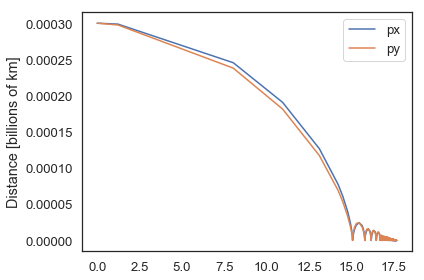

In [13]:
results.px.plot()
results.py.plot()
decorate(ylabel='Distance [billions of km]')

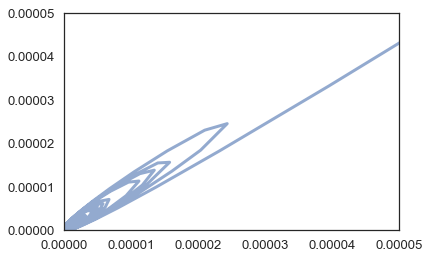

In [14]:
axes = plt.gca()
axes.set_xlim([0, 0.00005])
axes.set_ylim([0, 0.00005])

plot(results.px,results.py)

ValueError: not enough values to unpack (expected 2, got 0)

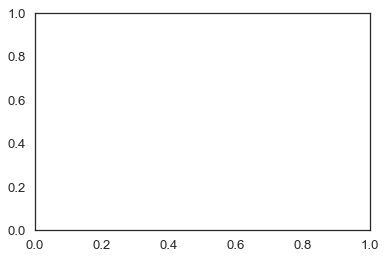

In [15]:
axes = plt.gca()
axes.set_xlim([])
axes.set_ylim([])

resultsplot=plt.run_ode_solver(system, slope_func, vectorized = True)
results.px/=1e9
results.py/=1e4
plt.xlim([12.5, 17.5])
plt.ylim([0, .05])
plt.show()